## Supplement 4: Classification

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.


In [2]:

def sigmoid(z):
    #Compute the sigmoid function
    return 1 / (1 + np.exp(-z))

def compute_loss_and_gradient(X, y, model_parameters):
    """
    Compute the binary cross-entropy loss and its gradient.

    Parameters:
    - X: np.ndarray, shape (m, n), input data (m examples, n features)
    - y: np.ndarray, shape (m,), true labels (0 or 1)
    - model_parameters: np.ndarray, shape (n,), model parameters

    Returns:
    - loss: float, the binary cross-entropy loss
    - gradient: np.ndarray, shape (n,), the gradient of the loss with respect to model_parameters
    """
    m = X.shape[0]  # Number of examples

    # Compute predictions
    z = np.dot(X, model_parameters)
    y_pred = sigmoid(z)

    # Compute the binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))  #Adds a small value (1e-15) to avoid log of zero errors.

    # Compute the gradient
    gradient = np.dot(X.T, (y_pred - y)) / m

    return loss, gradient


   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [3]:
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
  # Train a logistic regression model using gradient descent.
    m, n = X.shape
    model_parameters = np.zeros(n)  # Initialize parameters
    losses = []  # To store the loss at each epoch

    for epoch in range(epochs):
        # Compute loss and gradient
        loss, gradient = compute_loss_and_gradient(X, y, model_parameters)

        # Update parameters
        model_parameters -= learning_rate * gradient

        # Store loss
        losses.append(loss)


    return model_parameters, losses





iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [4]:
import pandas as pd

def confusion_matrix_metrics(y_true, y_pred, threshold=0.4):
    """
    Compute confusion matrix, precision, recall, and F1-score.

    Parameters:
    - y_true: np.ndarray, true labels (0 or 1)
    - y_pred: np.ndarray, predicted probabilities
    - threshold: float, threshold for classification

    Returns:
    - metrics: dict, containing TP, FP, TN, FN, precision, recall, F1-score
    """
    # Convert probabilities to binary predictions
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred_binary == 1))
    FP = np.sum((y_true == 0) & (y_pred_binary == 1))
    TN = np.sum((y_true == 0) & (y_pred_binary == 0))
    FN = np.sum((y_true == 1) & (y_pred_binary == 0))

    # Precision, Recall, F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics = {
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }
    return metrics

# Load test data
test_data = pd.read_csv("test-songs.csv")
X_test = test_data.iloc[:, :-1].values  # last column is the label
y_test = test_data.iloc[:, -1].values

#train model
model_parameters, losses = train_logistic_regression(X_test, y_test)

# Predict probabilities using trained model
y_test_pred_probs = sigmoid(np.dot(X_test, model_parameters))

# Compute metrics
threshold = 0.4
metrics = confusion_matrix_metrics(y_test, y_test_pred_probs, threshold)

# Print metrics
print("Confusion Matrix:")
print(f"TP: {metrics['TP']}, FP: {metrics['FP']}, TN: {metrics['TN']}, FN: {metrics['FN']}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")




Confusion Matrix:
TP: 294, FP: 47, TN: 953, FN: 706
Precision: 0.8622
Recall: 0.2940
F1-Score: 0.4385


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


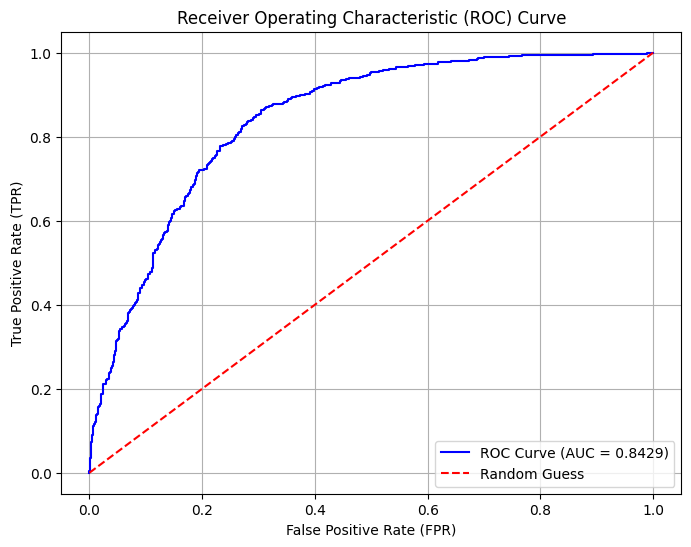

AUC of the model: 0.8429


In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate prediction probabilities using the sigmoid function
y_test_pred_probs = sigmoid(np.dot(X_test, model_parameters))

# Generate the ROC curve for evaluating model performance
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC of the model: {roc_auc:.4f}")



v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

In [6]:
from sklearn.model_selection import train_test_split

dataset = test_data


# Specify input features for models A, B, and C
features_A = ['danceability', 'key', 'valence', 'tempo']
features_B = ['danceability', 'loudness', 'acousticness', 'instrumentalness']
features_C = ['key', 'liveness', 'valence', 'tempo']

# Split dataset into training and testing sets
X = dataset.drop(columns=['popular'])
y = dataset['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(selected_features):
    # Select features
    X_train_subset = X_train[selected_features].values
    X_test_subset = X_test[selected_features].values

    # Fit the logistic regression model to the training data
    model_parameters, _ = train_logistic_regression(X_train_subset, y_train, learning_rate=0.1, epochs=1000)

    # Predict probabilities on the test set
    y_test_pred_probs = sigmoid(np.dot(X_test_subset, model_parameters))

    # Generate the ROC curve for evaluating model performance and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_probs)
    auc_score = auc(fpr, tpr)

    return auc_score

# Compare models A, B, and C using their respective features
auc_A = train_and_evaluate_model(features_A)
auc_B = train_and_evaluate_model(features_B)
auc_C = train_and_evaluate_model(features_C)

# Print results
print(f"Model A AUC: {auc_A:.4f}")
print(f"Model B AUC: {auc_B:.4f}")
print(f"Model C AUC: {auc_C:.4f}")

# Determine the best model
best_model = max([(auc_A, "Model A"), (auc_B, "Model B"), (auc_C, "Model C")], key=lambda x: x[0])
print(f"The best-performing model is {best_model[1]} with an AUC of {best_model[0]:.4f}.")


C:\Users\Khaled\AppData\Local\Temp\ipykernel_13912\2093163532.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\Khaled\AppData\Local\Temp\ipykernel_13912\2093163532.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Model A AUC: 0.5051
Model B AUC: 0.8741
Model C AUC: 0.5357
The best-performing model is Model B with an AUC of 0.8741.
